In [1]:
import torch
import torch.nn as nn

from src.model.models import MLP, Flow, Diffusion
from src.data.helpers import get_accuracy, get_moons_dataset, rotate, generate_flow, generate_diffusion, list_to_model

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np

## Transfer Learning

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Hyperparameters
epochs = 1000
learning_rate = 0.05

# Model config
input_dim = 2
hidden_dims = [8]
output_dim = 1

seed = 42

# Dataset
X,y = get_moons_dataset()
criterion = nn.BCELoss()

# Logging
torch.manual_seed(seed)


epochs_till_convergence_clean = []

# Training loop
for i in tqdm(range(1000)):
    angle = torch.randint(0, 360, (1,)).item()
    X_rotated = rotate(X, angle)
    X_tensor = torch.tensor(X_rotated, dtype=torch.float32).to(device)
    y_tensor = torch.tensor(y, dtype=torch.float32).to(device)

    model = MLP(input_dim=input_dim, hidden_dims=hidden_dims, output_dim=output_dim)
    model.to(device)
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X_tensor).flatten()
        loss = criterion(y_pred, y_tensor)
        loss.backward()
        optimizer.step()

        # Eval loop
        model.eval()
        y_pred = model(X_tensor).flatten()
        correct = (y_pred.round() == y_tensor).sum().item()
        accuracy = correct / len(y)

        if(accuracy >= 0.95):
            epochs_till_convergence_clean.append(epoch)
            break



  0%|          | 0/1000 [00:00<?, ?it/s]

In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

flow = Flow()
flow.load_state_dict(torch.load("../models/generators/flow_matching/flow_conditional.pth"))

# Hyperparameters
epochs = 1000
learning_rate = 0.05

# Model config
input_dim = 2
hidden_dims = [8]
output_dim = 1

seed = 42

# Dataset
X,y = get_moons_dataset()
criterion = nn.BCELoss()

# Logging
torch.manual_seed(seed)


epochs_till_convergence_flow = []

# Training loop
for i in tqdm(range(1000)):
    angle = torch.randint(0, 360, (1,)).item()
    X_rotated = rotate(X, angle)
    X_tensor = torch.tensor(X_rotated, dtype=torch.float32).to(device)
    y_tensor = torch.tensor(y, dtype=torch.float32).to(device)

    model = MLP(input_dim=input_dim, hidden_dims=hidden_dims, output_dim=output_dim)
    sample_parameters = generate_flow(flow, angle)
    list_to_model(model, sample_parameters)
    model.to(device)
    model.train()
    
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X_tensor).flatten()
        loss = criterion(y_pred, y_tensor)
        loss.backward()
        optimizer.step()

        # Eval loop
        model.eval()
        y_pred = model(X_tensor).flatten()
        correct = (y_pred.round() == y_tensor).sum().item()
        accuracy = correct / len(y)

        if(accuracy >= 0.95):
            epochs_till_convergence_flow.append(epoch)
            break

  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Projects\Python\master-thesis\src\data\helpers.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  param.data = torch.tensor(parameters_from_list, dtype=torch.float32).reshape(param.shape)


In [24]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

diffusion = Diffusion()
diffusion.load_state_dict(torch.load("../models/generators/diffusion/diffusion_conditional.pth"))

# Hyperparameters
epochs = 1000
learning_rate = 0.05

# Model config
input_dim = 2
hidden_dims = [8]
output_dim = 1

seed = 42

# Dataset
X,y = get_moons_dataset()
criterion = nn.BCELoss()

# Logging
torch.manual_seed(seed)


epochs_till_convergence_diffusion = []

# Training loop
for i in tqdm(range(1000)):
    angle = torch.randint(0, 360, (1,)).item()
    X_rotated = rotate(X, angle)
    X_tensor = torch.tensor(X_rotated, dtype=torch.float32).to(device)
    y_tensor = torch.tensor(y, dtype=torch.float32).to(device)

    model = MLP(input_dim=input_dim, hidden_dims=hidden_dims, output_dim=output_dim)
    sample_parameters = generate_diffusion(diffusion, angle)
    list_to_model(model, sample_parameters)
    model.to(device)
    model.train()
    
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X_tensor).flatten()
        loss = criterion(y_pred, y_tensor)
        loss.backward()
        optimizer.step()

        # Eval loop
        model.eval()
        y_pred = model(X_tensor).flatten()
        correct = (y_pred.round() == y_tensor).sum().item()
        accuracy = correct / len(y)

        if(accuracy >= 0.95):
            epochs_till_convergence_diffusion.append(epoch)
            break

  0%|          | 0/1000 [00:00<?, ?it/s]

In [28]:
print(f"Average epochs for clean: {np.mean(epochs_till_convergence_clean)}")
print(f"Average epochs for flow: {np.mean(epochs_till_convergence_flow)}")
print(f"Average epochs for diffusion: {np.mean(epochs_till_convergence_diffusion)}")

Average epochs for clean: 73.16203703703704
Average epochs for flow: 2.5195195195195197
Average epochs for diffusion: 0.818


## Flow matching trained with different samples per angle

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Hyperparameters
epochs = 1000
learning_rate = 0.05

# Model config
input_dim = 2
hidden_dims = [8]
output_dim = 1

seed = 42

# Dataset
X,y = get_moons_dataset()
criterion = nn.BCELoss()

# Logging
torch.manual_seed(seed)


epochs_till_convergence_clean = []

# Training loop
for i in tqdm(range(100)):
    angle = torch.randint(0, 360, (1,)).item()
    X_rotated = rotate(X, angle)
    X_tensor = torch.tensor(X_rotated, dtype=torch.float32).to(device)
    y_tensor = torch.tensor(y, dtype=torch.float32).to(device)

    model = MLP(input_dim=input_dim, hidden_dims=hidden_dims, output_dim=output_dim)
    model.to(device)
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X_tensor).flatten()
        loss = criterion(y_pred, y_tensor)
        loss.backward()
        optimizer.step()

        # Eval loop
        model.eval()
        y_pred = model(X_tensor).flatten()
        correct = (y_pred.round() == y_tensor).sum().item()
        accuracy = correct / len(y)

        if(accuracy >= 0.95):
            epochs_till_convergence_clean.append(epoch)
            break

  0%|          | 0/100 [00:00<?, ?it/s]

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

flow = Flow()
flow.load_state_dict(torch.load("../models/generators/flow_matching/flow_conditional_10spa.pth"))

# Hyperparameters
epochs = 1000
learning_rate = 0.05

# Model config
input_dim = 2
hidden_dims = [8]
output_dim = 1

seed = 42

# Dataset
X,y = get_moons_dataset()
criterion = nn.BCELoss()

# Logging
torch.manual_seed(seed)


epochs_till_convergence_10spa = []

# Training loop
for i in tqdm(range(100)):
    angle = torch.randint(0, 360, (1,)).item()
    X_rotated = rotate(X, angle)
    X_tensor = torch.tensor(X_rotated, dtype=torch.float32).to(device)
    y_tensor = torch.tensor(y, dtype=torch.float32).to(device)

    model = MLP(input_dim=input_dim, hidden_dims=hidden_dims, output_dim=output_dim)
    sample_parameters = generate_flow(flow, angle)
    list_to_model(model, sample_parameters)
    model.to(device)
    model.train()
    
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X_tensor).flatten()
        loss = criterion(y_pred, y_tensor)
        loss.backward()
        optimizer.step()

        # Eval loop
        model.eval()
        y_pred = model(X_tensor).flatten()
        correct = (y_pred.round() == y_tensor).sum().item()
        accuracy = correct / len(y)

        if(accuracy >= 0.95):
            epochs_till_convergence_10spa.append(epoch)
            break

  0%|          | 0/100 [00:00<?, ?it/s]

C:\Projects\Python\master-thesis\src\data\helpers.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  param.data = torch.tensor(parameters_from_list, dtype=torch.float32).reshape(param.shape)


In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

flow = Flow()
flow.load_state_dict(torch.load("../models/generators/flow_matching/flow_conditional_100spa.pth"))

# Hyperparameters
epochs = 1000
learning_rate = 0.05

# Model config
input_dim = 2
hidden_dims = [8]
output_dim = 1

seed = 42

# Dataset
X,y = get_moons_dataset()
criterion = nn.BCELoss()

# Logging
torch.manual_seed(seed)


epochs_till_convergence_100spa = []

# Training loop
for i in tqdm(range(100)):
    angle = torch.randint(0, 360, (1,)).item()
    X_rotated = rotate(X, angle)
    X_tensor = torch.tensor(X_rotated, dtype=torch.float32).to(device)
    y_tensor = torch.tensor(y, dtype=torch.float32).to(device)

    model = MLP(input_dim=input_dim, hidden_dims=hidden_dims, output_dim=output_dim)
    sample_parameters = generate_flow(flow, angle)
    list_to_model(model, sample_parameters)
    model.to(device)
    model.train()
    
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X_tensor).flatten()
        loss = criterion(y_pred, y_tensor)
        loss.backward()
        optimizer.step()

        # Eval loop
        model.eval()
        y_pred = model(X_tensor).flatten()
        correct = (y_pred.round() == y_tensor).sum().item()
        accuracy = correct / len(y)

        if(accuracy >= 0.95):
            epochs_till_convergence_100spa.append(epoch)
            break

  0%|          | 0/100 [00:00<?, ?it/s]

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

flow = Flow()
flow.load_state_dict(torch.load("../models/generators/flow_matching/flow_conditional_1000spa.pth"))

# Hyperparameters
epochs = 1000
learning_rate = 0.05

# Model config
input_dim = 2
hidden_dims = [8]
output_dim = 1

seed = 42

# Dataset
X,y = get_moons_dataset()
criterion = nn.BCELoss()

# Logging
torch.manual_seed(seed)


epochs_till_convergence_1000spa = []

# Training loop
for i in tqdm(range(100)):
    angle = torch.randint(0, 360, (1,)).item()
    X_rotated = rotate(X, angle)
    X_tensor = torch.tensor(X_rotated, dtype=torch.float32).to(device)
    y_tensor = torch.tensor(y, dtype=torch.float32).to(device)

    model = MLP(input_dim=input_dim, hidden_dims=hidden_dims, output_dim=output_dim)
    sample_parameters = generate_flow(flow, angle)
    list_to_model(model, sample_parameters)
    model.to(device)
    model.train()
    
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X_tensor).flatten()
        loss = criterion(y_pred, y_tensor)
        loss.backward()
        optimizer.step()

        # Eval loop
        model.eval()
        y_pred = model(X_tensor).flatten()
        correct = (y_pred.round() == y_tensor).sum().item()
        accuracy = correct / len(y)

        if(accuracy >= 0.95):
            epochs_till_convergence_1000spa.append(epoch)
            break

  0%|          | 0/100 [00:00<?, ?it/s]

<BarContainer object of 4 artists>

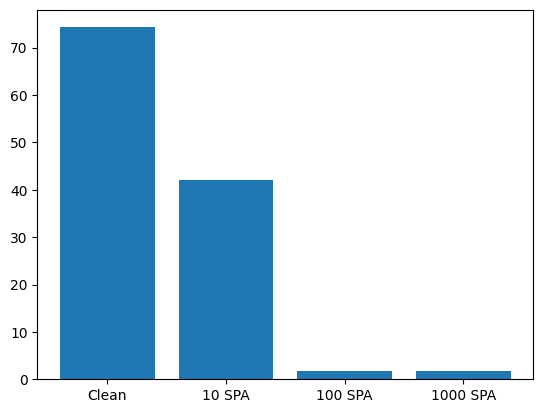

In [6]:
plt.bar(["Clean", "10 SPA", "100 SPA", "1000 SPA"], [np.mean(epochs_till_convergence_clean), np.mean(epochs_till_convergence_10spa), np.mean(epochs_till_convergence_100spa), np.mean(epochs_till_convergence_1000spa)])